# <center> Gradient Boosted Decision Tree Classifier
Gradient boosted decision tree ensemble is trained on feature set 1

## <font color='royalblue'> Get the data </p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([6, 6, 5, ..., 0, 4, 1])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 4, ..
y_32_train                -> array([0, 3, 4, ..., 0, 3, 1])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_train_std.shape, "and labels: ", y_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_test_std), X_test_std[18].shape, "arrays for SNR values:")
print(sorted(X_test_std.keys()))

Training data:  (80000, 16) and labels:  (80000,)
 
Test data:
Total 20 (4000, 16) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## <font color='royalblue'>Train and test the classifier

In [4]:
#Train the classifier

gradboost_clf =  GradientBoostingClassifier(n_estimators=500, max_depth=14, min_samples_split=4, max_features='auto',
                                           max_leaf_nodes=149)

start = time()
gradboost_clf.fit(X_train_std, y_train)  
print("Training took %.2f seconds"%(time() - start))

print(" ")
print("Classifier:")
print(gradboost_clf)

Training took 2911.80 seconds
 
Classifier:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=14,
              max_features='auto', max_leaf_nodes=149,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [7]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = gradboost_clf.predict(X_test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_test[snr], y_pred[snr])
    print("Gradient boosted decision trees, accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR values

Test the classifier
 
Gradient boosted decision trees, accuracy on -20 dB SNR samples =  0.12975
Gradient boosted decision trees, accuracy on -18 dB SNR samples =  0.12975
Gradient boosted decision trees, accuracy on -16 dB SNR samples =  0.12375
Gradient boosted decision trees, accuracy on -14 dB SNR samples =  0.1315
Gradient boosted decision trees, accuracy on -12 dB SNR samples =  0.1345
Gradient boosted decision trees, accuracy on -10 dB SNR samples =  0.166
Gradient boosted decision trees, accuracy on -8 dB SNR samples =  0.24025
Gradient boosted decision trees, accuracy on -6 dB SNR samples =  0.31125
Gradient boosted decision trees, accuracy on -4 dB SNR samples =  0.39125
Gradient boosted decision trees, accuracy on -2 dB SNR samples =  0.44225
Gradient boosted decision trees, accuracy on 0 dB SNR samples =  0.5385
Gradient boosted decision trees, accuracy on 2 dB SNR samples =  0.64025
Gradient boosted decision trees, accuracy on 4 dB SNR samples =  0.78275
Gradient boosted d

## <font color='royalblue'> Visualize classifier performance

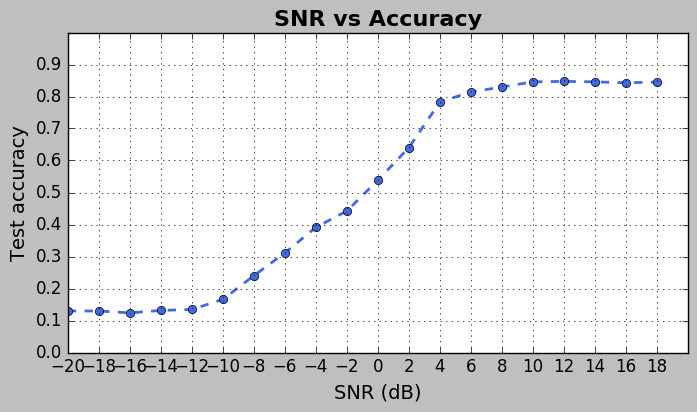

In [8]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [12]:
from sklearn.externals import joblib

joblib.dump(gradboost_clf, "grad_boost2.pkl")

['grad_boost2.pkl']

In [1]:
import pickle
from sklearn.externals import joblib
gradboost_clf = joblib.load("grad_boost2.pkl")